In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [20]:
df=pd.read_csv('Covid.csv')
print(df)

           Date  Unnamed: 1 Unnamed: 2    cases deaths
0    30-01-2020         NaN        NaN      1.0    NaN
1    01-02-2020         NaN        NaN      1.0    NaN
2    02-02-2020         NaN          ?      2.0    NaN
3    03-02-2020         NaN          ?      3.0    NaN
4             ?         NaN          ?      3.0    NaN
..          ...         ...        ...      ...    ...
385         NaN         NaN          ?      NaN    NaN
386         NaN         NaN          ?      NaN    NaN
387  21-07-2020         NaN          ?  13994.0  44(+1
388         NaN         NaN          ?      NaN    NaN
389         NaN         NaN          ?      NaN    NaN

[390 rows x 5 columns]


In [21]:
df=df[['Date','cases']]
df.dropna(inplace=True)
print(df)

           Date    cases
0    30-01-2020      1.0
1    01-02-2020      1.0
2    02-02-2020      2.0
3    03-02-2020      3.0
4             ?      3.0
..          ...      ...
375  17-07-2020  11066.0
378  18-07-2020  11659.0
381  19-07-2020  12480.0
384  20-07-2020  13274.0
387  21-07-2020  13994.0

[141 rows x 2 columns]


In [22]:
df['next_day_cases']=df['cases'].shift(+1)
print(df)

           Date    cases  next_day_cases
0    30-01-2020      1.0             NaN
1    01-02-2020      1.0             1.0
2    02-02-2020      2.0             1.0
3    03-02-2020      3.0             2.0
4             ?      3.0             3.0
..          ...      ...             ...
375  17-07-2020  11066.0         10275.0
378  18-07-2020  11659.0         11066.0
381  19-07-2020  12480.0         11659.0
384  20-07-2020  13274.0         12480.0
387  21-07-2020  13994.0         13274.0

[141 rows x 3 columns]


In [23]:
df['daily_cases']=df['cases']-df['next_day_cases']
print(df)

           Date    cases  next_day_cases  daily_cases
0    30-01-2020      1.0             NaN          NaN
1    01-02-2020      1.0             1.0          0.0
2    02-02-2020      2.0             1.0          1.0
3    03-02-2020      3.0             2.0          1.0
4             ?      3.0             3.0          0.0
..          ...      ...             ...          ...
375  17-07-2020  11066.0         10275.0        791.0
378  18-07-2020  11659.0         11066.0        593.0
381  19-07-2020  12480.0         11659.0        821.0
384  20-07-2020  13274.0         12480.0        794.0
387  21-07-2020  13994.0         13274.0        720.0

[141 rows x 4 columns]


In [24]:
df=df.iloc[5:,:]
print(df)

           Date    cases  next_day_cases  daily_cases
5    08-03-2020      8.0             3.0          5.0
7    09-03-2020      8.0             8.0          0.0
9    10-03-2020     14.0             8.0          6.0
11   11-03-2020     14.0            14.0          0.0
13   12-03-2020     19.0            14.0          5.0
..          ...      ...             ...          ...
375  17-07-2020  11066.0         10275.0        791.0
378  18-07-2020  11659.0         11066.0        593.0
381  19-07-2020  12480.0         11659.0        821.0
384  20-07-2020  13274.0         12480.0        794.0
387  21-07-2020  13994.0         13274.0        720.0

[136 rows x 4 columns]


In [26]:
df=df[['Date','cases','daily_cases']]
print(df) 

           Date    cases  daily_cases
5    08-03-2020      8.0          5.0
7    09-03-2020      8.0          0.0
9    10-03-2020     14.0          6.0
11   11-03-2020     14.0          0.0
13   12-03-2020     19.0          5.0
..          ...      ...          ...
375  17-07-2020  11066.0        791.0
378  18-07-2020  11659.0        593.0
381  19-07-2020  12480.0        821.0
384  20-07-2020  13274.0        794.0
387  21-07-2020  13994.0        720.0

[136 rows x 3 columns]


In [27]:
df.set_index('Date',inplace=True)

In [28]:
print(df)

              cases  daily_cases
Date                            
08-03-2020      8.0          5.0
09-03-2020      8.0          0.0
10-03-2020     14.0          6.0
11-03-2020     14.0          0.0
12-03-2020     19.0          5.0
...             ...          ...
17-07-2020  11066.0        791.0
18-07-2020  11659.0        593.0
19-07-2020  12480.0        821.0
20-07-2020  13274.0        794.0
21-07-2020  13994.0        720.0

[136 rows x 2 columns]


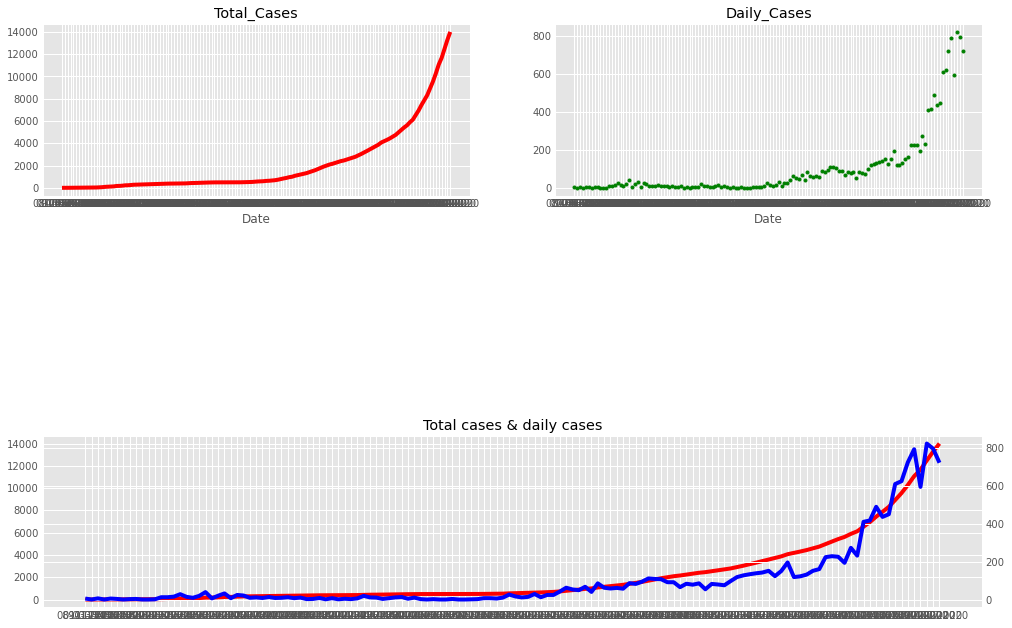

In [66]:
xs=df.index
ys=df['cases']
ys2=df['daily_cases']
#creating plots to visualize data
plt.subplot(3,2,1)
plt.plot(xs,ys,'r')
plt.xlabel('Date')
plt.title('Total_Cases')
plt.subplot(3,2,2)
plt.plot(xs,ys2,'g.')
plt.xlabel('Date')
plt.title('Daily_Cases')
ax1=plt.subplot(3,1,3)
ax2=ax1.twinx()
curve1=ax1.plot(xs,ys,'r',label='Total_Cases')
curve2=ax2.plot(xs,ys2,'b',label='Daily_Cases')
plt.title('Total cases & daily cases')
plt.rcParams['figure.figsize']=(15,10)
plt.show()